# PROBLEM STATEMENT

- Developing a model to predict the impact of increasing the vehicle horsepower (HP) on fuel economy (Mileage Per Gallon (MPG)). 
- Data set:
    - Independant variable X: Vehicle Horse Power 
    - Dependant variable Y: Mileage Per Gallon (MPG) 

# STEP #1: LIBRARIES IMPORT


In [3]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# STEP #2: IMPORT DATASET

In [4]:
#import dataset
df = pd.read_csv("FuelEconomy.csv")

In [5]:
df

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739
...,...,...
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593


In [6]:
df.tail(5)

,Horse Power,Fuel Economy (MPG)
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593
99,184.123053,25.196097


In [7]:
df.describe()

,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


# STEP#3: VISUALIZE DATASET

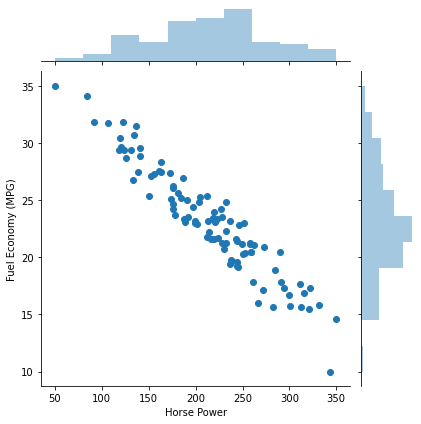

In [9]:
sns.jointplot(x = 'Horse Power', y = 'Fuel Economy (MPG)', data = df)

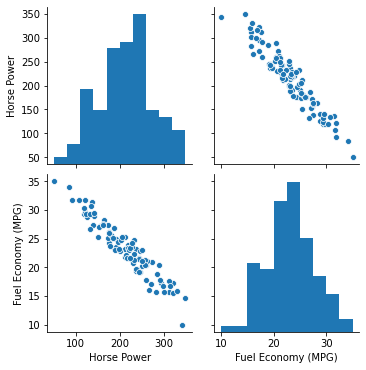

In [10]:
sns.pairplot(df)

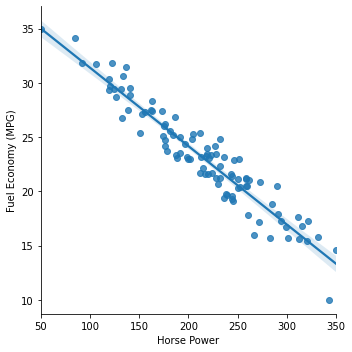

In [11]:
sns.lmplot(x = 'Horse Power', y = 'Fuel Economy (MPG)', data = df)

# STEP#4: CREATE TESTING AND TRAINING DATASET

In [21]:
# create independent variable
X = df[['Horse Power']]

In [22]:
# create dependent variable
y = df[['Fuel Economy (MPG)']]

In [23]:
X

,Horse Power
0,118.770799
1,176.326567
2,219.262465
3,187.310009
4,218.594340
...,...
95,162.810542
96,266.869640
97,243.831211
98,140.959803


In [24]:
y

,Fuel Economy (MPG)
0,29.344195
1,24.695934
2,23.952010
3,23.384546
4,23.426739
...,...
95,27.418661
96,15.989945
97,19.253375
98,29.515593


In [25]:
#split dataset into training and test set
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.20)

# STEP#5: TRAIN THE MODEL

In [27]:
X_train.shape

(80, 1)

In [31]:
# train the model
from sklearn.linear_model import LinearRegression

In [34]:
regressor = LinearRegression(fit_intercept= True)

In [35]:
regressor.fit(X_train, y_train)

LinearRegression()

In [36]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [[-0.07260939]]
Linear Model Coefficient (b):  [38.76528068]


# STEP#6: TEST THE MODEL 

In [39]:
# predict test set values
y_pred = regressor.predict(X_test)
y_pred

array([[20.93534374],
       [19.75235821],
       [25.99778271],
       [26.03330273],
       [29.60117613],
       [25.0780308 ],
       [25.98753658],
       [24.31903842],
       [22.23426664],
       [28.53027513],
       [22.84476643],
       [23.87695745],
       [16.9059196 ],
       [17.38719396],
       [20.42760553],
       [21.88723131],
       [24.84498466],
       [21.50798249],
       [15.83396417],
       [27.70339542]])

In [40]:
y_test

,Fuel Economy (MPG)
66,19.139999
73,21.050399
5,24.173571
72,26.057085
8,28.718210
64,23.114161
31,26.188478
80,23.172223
44,21.205987
98,29.515593


Text(0.5, 1.0, 'HP vs. MPG(Training dataset)')

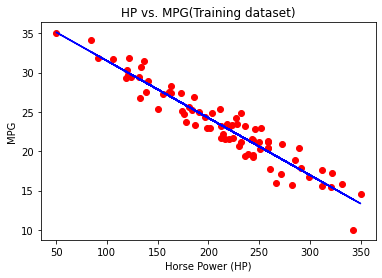

In [41]:
# visualize train set data
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.ylabel('MPG')
plt.xlabel('Horse Power (HP)')
plt.title('HP vs. MPG(Training dataset)')

Text(0.5, 1.0, 'HP vs. MPG(Training dataset)')

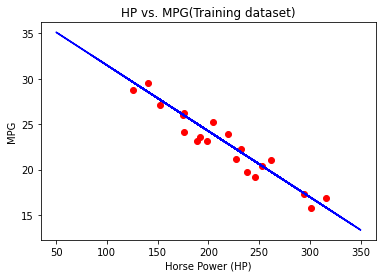

In [42]:
#visualize test set data
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.ylabel('MPG')
plt.xlabel('Horse Power (HP)')
plt.title('HP vs. MPG(Training dataset)')